In [1]:
# from typing import Any
# import torch
# from pathlib import Path
# from emonet.models import EmoNet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from face_alignment.detection.sfd.sfd_detector import SFDDetector
import os

sfd_detector = SFDDetector('cuda:0')

In [2]:
# 
dataset_path = os.path.expandvars("%USERPROFILE%/datasets/AffectiveComputing/Emotic")


In [3]:
# 
dataset = 'annot_arrs_test.csv'
df = pd.read_csv(f'{dataset_path}/annots_arrs/{dataset}')
# df.describe()
df.head()

,Filename,Width,Height,Age,Gender,Valence,Arousal,Dominance,Peace,Affection,...,Disquietment,Fear,Pain,Suffering,X_min,Y_min,X_max,Y_max,Arr_name,Crop_name
0,frame_ghkq7yp0itqz0kn7.jpg,640.0,426.0,Adult,Female,6.666666,4.333334,5.666666,1.0,1.0,...,0.0,0.0,0.0,0.0,279.0,18.0,623.0,425.0,img_arr_18782.npy,crop_arr_test_0.npy
1,COCO_train2014_000000449158.jpg,640.0,480.0,Teenager,Female,5.000000,4.000000,6.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,379.0,210.0,520.0,479.0,img_arr_18783.npy,crop_arr_test_1.npy
2,COCO_train2014_000000449158.jpg,640.0,480.0,Adult,Male,4.333334,4.666666,5.666666,0.0,0.0,...,0.0,0.0,0.0,0.0,463.0,197.0,604.0,473.0,img_arr_18783.npy,crop_arr_test_2.npy
3,COCO_train2014_000000081845.jpg,640.0,427.0,Adult,Female,7.000000,5.333334,6.666666,1.0,0.0,...,0.0,0.0,0.0,0.0,409.0,120.0,600.0,422.0,img_arr_18784.npy,crop_arr_test_3.npy
4,COCO_train2014_000000081845.jpg,640.0,427.0,Adult,Female,7.000000,4.333334,6.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,247.0,91.0,365.0,285.0,img_arr_18784.npy,crop_arr_test_4.npy


In [128]:
df.iloc[1]

Filename           COCO_train2014_000000449158.jpg
Width                                        640.0
Height                                       480.0
Age                                       Teenager
Gender                                      Female
Valence                                        5.0
Arousal                                        4.0
Dominance                                      6.0
Peace                                          1.0
Affection                                      0.0
Esteem                                         1.0
Anticipation                                   0.0
Engagement                                     0.0
Confidence                                     0.0
Happiness                                      1.0
Pleasure                                       1.0
Excitement                                     1.0
Surprise                                       0.0
Sympathy                                       0.0
Doubt/Confusion                

[ 77.55057776  17.98601127 103.06015074  58.47749305   0.95441169]


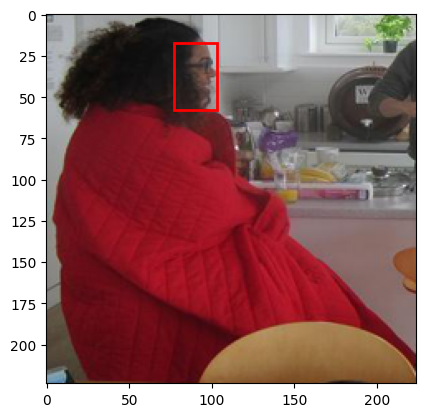

In [8]:
# Show image and detected face
idx = 108
row = df.iloc[idx]
img = np.load( f'{dataset_path}/img_arrs/{row["Crop_name"]}' )

# show img
fig, ax = plt.subplots()

ax.imshow(img)

# add detected faces
for face in sfd_detector.detect_from_image(img[:, :, ::-1]):
    print(face)
    bbox = np.array(face).astype(np.int32)
    x_min, y_min, x_max, y_max = bbox[0], bbox[1], bbox[2], bbox[3]
    rect = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [121]:
# TEST: determine how many images have detectable faces
import random
indeces = list(range(len(df)))
random.seed(1)
random.shuffle(indeces)

dets = {}
amount = 2_000
for i, idx in enumerate(indeces[:amount]):
    row = df.iloc[idx]
    img = np.load( f'{dataset_path}/img_arrs/{row["Crop_name"]}' )
    faces = sfd_detector.detect_from_image(img[:, :, ::-1])
    dets[len(faces)] = dets.get(len(faces), 0) + 1
    # print('{:>4}: idx={} faces='.format(i, idx), end='')
    # print(len(faces))

# print report
print('dataset:', dataset)
print('total count:', len(df))
print('tested: {} ({:.1f}%)'.format(amount, amount / len(df) * 100))
print('\nFACES |  PERC')
for x, count in dets.items():
    perc = count / amount * 100
    print('  {:>3} :  {:.2f} %  (count={})'.format(x, perc, count))

dataset: annot_arrs_test.csv
total count: 7279
tested: 2000 (27.5%)

FACES |  PERC
    1 :  41.40 %  (count=828)
    0 :  50.65 %  (count=1013)
    3 :  1.15 %  (count=23)
    2 :  6.55 %  (count=131)
    5 :  0.05 %  (count=1)
    4 :  0.20 %  (count=4)
